# CHAPTER 2 An array of sequences
## Overview of built-in sequences
The standard library offers a rich selection of sequence types implemented in C:
### Container sequences
list, tuple and collections.deque can hold items of different types.
### Flat sequences
str, bytes, bytearray, memoryview and array.array hold items of one type.
Container sequences hold references to the objects they contain, which may be of any
type, while flat sequences physically store the value of each item within its own memory
space, and not as distinct objects. Thus, flat sequences are more compact, but they are
limited to holding primitive values like characters, bytes and numbers
Another way of grouping sequence types is by mutability:
### Mutable sequences
list, bytearray, array.array, collections.deque and memoryview
### Immutable sequences
tuple, str and bytes

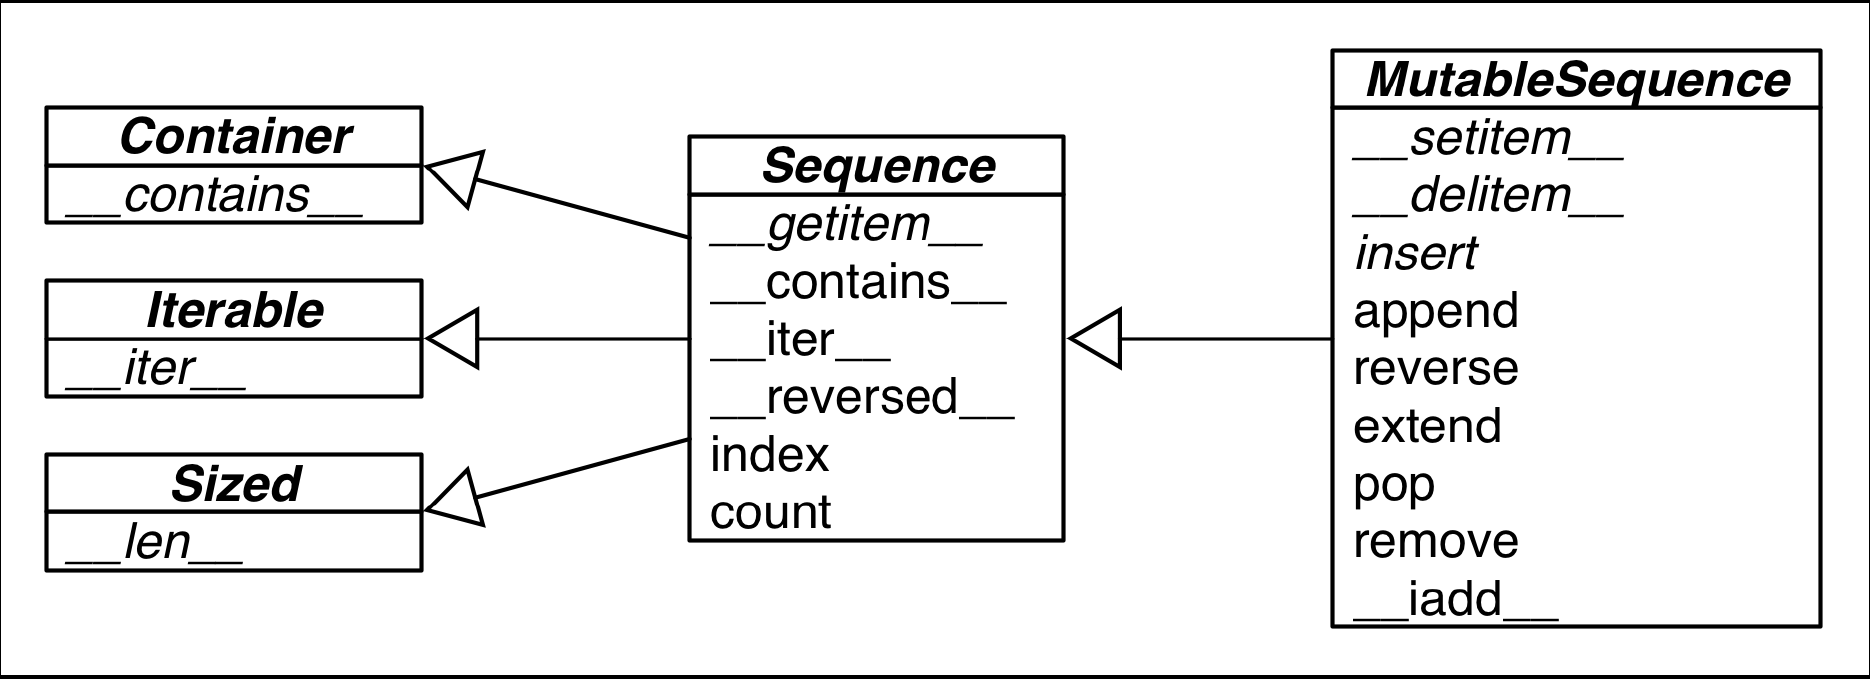

## List comprehensions and generator expressions
A quick way to build a sequence is using a list comprehension (if the target is a list)
or a generator expression (for all other kinds of sequences).

In [8]:
symbols = '$¢£¥€¤蔡强a'
codes = []
for symbol in symbols:
    codes.append(ord(symbol))
codes

[36, 162, 163, 165, 8364, 164, 34081, 24378, 97]

In [9]:
codes = [ord(symbol) for symbol in symbols]
codes

[36, 162, 163, 165, 8364, 164, 34081, 24378, 97]

### ord(c)
Given a string representing one Unicode character, return an integer representing the Unicode code point of that character. For example, ord('a') returns the integer 97 and ord('€') (Euro sign) returns 8364. This is the inverse of chr().

In Python code, line breaks are ignored inside pairs of [], {} or ().
So you can build multi-line lists, listcomps, genexps, dictionaries etc.
without using the ugly \ line continuation escape.

### Listcomps versus map and filter
### Cartesian products

In [12]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [11]:
tshirts = [(color, size) for size in sizes for color in colors ]
tshirts

[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

### Generator expressions
To initialize tuples, arrays and other types of sequences, you could also start from a
listcomp but a genexp saves memory because it yields items one by one using the iterator
protocol instead of building a whole list just to feed another constructor.
Genexps use the same syntax as listcomps, but are enclosed in parenthesis rather than
brackets.

In [13]:
symbols = '$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [14]:
import array
array.array('I', (ord(symbol) for symbol in symbols))

array('I', [36, 162, 163, 165, 8364, 164])

### class array.array(typecode[, initializer])
A new array whose items are restricted by typecode, and initialized from the optional initializer value, which must be a list, a bytes-like object, or iterable over elements of the appropriate type.

If given a list or string, the initializer is passed to the new array’s fromlist(), frombytes(), or fromunicode() method (see below) to add initial items to the array. Otherwise, the iterable initializer is passed to the extend() method.

In [15]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


## Tuples are not just immutable lists
Tuples do double-duty: they can be used as immutable lists and also
as records with no field names. This use is sometimes overlooked, so we will start with
that.
### Tuples as records
Tuples hold records: each item in the tuple holds the data for one field and the position
of the item gives its meaning.

In [2]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'),
  ('ESP', 'XDA205856')]
for passport in sorted(traveler_ids):
    print('%s/%s' % passport)

BRA/CE342567
ESP/XDA205856
USA/31195855


In [5]:
for country, _ in traveler_ids:
    print(country)

USA
BRA
ESP


### Tuple unpacking 

In [8]:
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates
latitude

33.9425

In [9]:
longitude

-118.408056

In [10]:
divmod(20, 8)

(2, 4)

In [11]:
t=(20,8)
divmod(*t)

(2, 4)

In [12]:
quotient, remainder = divmod(*t)
quotient, remainder

(2, 4)

In [13]:
import os
_, filename = os.path.split('/home/luciano/.ssh/idrsa.pub')
filename

'idrsa.pub'

Sometimes when we only care about certain parts of a tuple when unpacking, a dummy
variable like _ is used as placeholder, as in the example above.
28 | Chapter 2: An array of sequences

Another way of focusing on just some of the items when unpacking a tuple is to use the *, as we’ll see right away.
### Using * to grab excess items

In [14]:
a, b, *rest = range(5)
a,b,rest

(0, 1, [2, 3, 4])

In [15]:
a, b, *rest = range(3)
a,b,rest

(0, 1, [2])

In [16]:
a, b, *rest = range(2)
a,b,rest

(0, 1, [])

In [17]:
a, *body, c, d = range(5)
a, body, c, d

(0, [1, 2], 3, 4)

In [18]:
*head, b, c, d = range(5)
head, b, c, d

([0, 1], 2, 3, 4)

Finally, a powerful feature of tuple unpacking is that it works with nested structures.
### Nested tuple unpacking

In [19]:
metro_areas = [
('Tokyo', 'JP', 36.933, (35.689722, 139.691667)), #
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833))]
print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas: #
    if longitude <= 0: #
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


#### str.format(*args, **kwargs)
Perform a string formatting operation. The string on which this method is called can contain literal text or replacement fields delimited by braces {}. Each replacement field contains either the numeric index of a positional argument, or the name of a keyword argument. Returns a copy of the string where each replacement field is replaced with the string value of the corresponding argument.
 "The sum of 1 + 2 is {0}".format(1+2)
 'The sum of 1 + 2 is 3'
 See Format String Syntax for a description of the various formatting options that can be specified in format strings.

Note When formatting a number (int, float, complex, decimal.Decimal and subclasses) with the n type (ex: '{:n}'.format(1234)), the function temporarily sets the LC_CTYPE locale to the LC_NUMERIC locale to decode decimal_point and thousands_sep fields of localeconv() if they are non-ASCII or longer than 1 byte, and the LC_NUMERIC locale is different than the LC_CTYPE locale. This temporary change affects other threads.
Changed in version 3.6.5: When formatting a number with the n type, the function sets temporarily the LC_CTYPE locale to the LC_NUMERIC locale in some cases.
### Named tuples
The collections.namedtuple function is a factory that produces subclasses
enhanced with field names and a class name — which helps debugging.

Instances of a class that you build with namedtuple take exactly the
same amount of memory as tuples because the field names are stored
in the class. They use less memory than a regular object because
they do store attributes in a per-instance __dict__.


In [20]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates')
tokyo = City('Tokyo', 'JP', 36.933, (35.689722, 139.691667))
tokyo.name

'Tokyo'

In [21]:
tokyo.coordinates

(35.689722, 139.691667)

A named tuple type has a few attributes in addition to those inherited from tuple.
Example 2-10 shows the most useful: the _fields class attribute, the class method
_make(iterable) and the _asdict() instance method.
_fields is a tuple with the field names of the class.
_make() lets you instantiate a named tuple from an iterable; City(*delhi_da
ta) would do the same.
_asdict() returns a collections.OrderedDict built from the named tuple
instance. That can be used to produce a nice display of city data.

In [22]:
City._fields

('name', 'country', 'population', 'coordinates')

In [23]:
LatLong = namedtuple('LatLong', 'lat long')
delhi_data = ('Delhi NCR', 'IN', 21.935, LatLong(28.613889, 77.208889))
delhi = City._make(delhi_data)
delhi._asdict()

OrderedDict([('name', 'Delhi NCR'),
             ('country', 'IN'),
             ('population', 21.935),
             ('coordinates', LatLong(lat=28.613889, long=77.208889))])

### Tuples as immutable lists
## Slicing
### Why slices and range exclude the last item
The Pythonic convention of excluding the last item in slices and ranges works well with
the zero-based indexing used in Python, C and many other languages. Some convenient
features of the convention are:
• It’s easy to see the length of a slice or range when only the stop position is given:
range(3) and my_list[:3] both produce three items.
• It’s easy to compute the length of a slice or range when start and stop are given: just
subtract stop - start.
• It’s easy to split a sequence in two parts at any index x, without overlapping: simply
get my_list[:x] and my_list[x:].

In [1]:
l = [10, 20, 30, 40, 50, 60]
l[:2]

[10, 20]

In [2]:
l[2:]

[30, 40, 50, 60]

In [3]:
l[:3]

[10, 20, 30]

In [4]:
l[3:]

[40, 50, 60]

### Slice objects
This is no secret, but worth repeating just in case: s[a:b:c] can be used to specify a
stride or step c, causing the resulting slice to skip items. The stride can also be negative,
returning items in reverse.

In [5]:
s='bicycle'
s[::3]

'bye'

In [6]:
s[::-1]

'elcycib'

In [7]:
s[::-3]

'eyb'

In [22]:
invoice = """
... 0.....6.................................40........52...55........
... 1909  Pimoroni PiBrella                    $17.50   3   $52.50
... 1489  6mm Tactile Switch x20               $4.95    2   $9.90
... 1510  Panavise Jr. - PV-201                $28.00   1   $28.00
... 1601  PiTFT Mini Kit 320x240               $34.95   1   $34.95
... """
SKU = slice(0, 6)
DESCRIPTION = slice(6, 40)
UNIT_PRICE = slice(40, 52)
QUANTITY = slice(52, 55)
ITEM_TOTAL = slice(55, None)
line_items = invoice.split('\n')[2:]
for item in line_items :
    print(item)
for item in line_items:
    print(item[UNIT_PRICE], item[DESCRIPTION],item[ITEM_TOTAL])

1909  Pimoroni PiBrella                    $17.50   3   $52.50
1489  6mm Tactile Switch x20               $4.95    2   $9.90
1510  Panavise Jr. - PV-201                $28.00   1   $28.00
1601  PiTFT Mini Kit 320x240               $34.95   1   $34.95

   $17.50    Pimoroni PiBrella                   $52.50
   $4.95     6mm Tactile Switch x20              $9.90
   $28.00    Panavise Jr. - PV-201               $28.00
   $34.95    PiTFT Mini Kit 320x240              $34.95
  


### Multi-dimensional slicing and ellipsis
The built-in sequence types in Python are one-dimensional, so they support only one
index or slice, and not a tuple of them.
The ellipsis — written with three full stops ... and not … (Unicode U+2026) — is recognized
as a token by the Python parser. It is an alias to the Ellipsis object, the single
instance of the ellipsis class4.
### Assigning to slices
Mutable sequences can be grafted, excised and otherwise modified in-place using slice
notation on the left side of an assignment statement or as the target of a del statement.

In [24]:
l=list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
l[2:5] = [20, 30]
l

[0, 1, 20, 30, 5, 6, 7, 8, 9]

In [26]:
del l[5:7]
l

[0, 1, 20, 30, 5, 8, 9]

In [27]:
l[3::2] = [11, 22]
l

[0, 1, 20, 11, 5, 22, 9]

In [28]:
l[2:5] = 100

TypeError: can only assign an iterable

## Using + and * with sequences
Python programmers expect that sequences support + and *. Usually both operands of + must be of the same sequence type, and neither of them is modified but a new sequence
of the same type is created as result of the concatenation.
To concatenate multiple copies of the same sequence, multiply it by an integer. Again,
a new sequence is created:
Both + and * always create a new object, and never change their operands.
Beware of expressions like a * n when a is a sequence containing
mutable items because the result may surprise you. For example,
trying to initialize a list of lists as my_list = [[]] * 3 will result in
a list with three references to the same inner list, which is probably
not what you want.

In [29]:
l = [1, 2, 3]
l*5

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [30]:
5 * 'abcd'

'abcdabcdabcdabcdabcd'

### Building lists of lists
Sometimes we need to initialize a list with a certain number of nested lists, for example,
to distribute students in a list of teams or to represent squares on a game board. The
best way of doing so is with a list comprehension, like this:

In [32]:
board = [['_'] * 3 for i in range(3)]
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [35]:
board[1][2]='x'
board

[['_', '_', '_'], ['_', '_', 'x'], ['_', '_', '_']]

A list with with three references to the same list is useless.

In [36]:
weird_board = [['_'] * 3] * 3
weird_board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [37]:
weird_board[1][2]='x'
weird_board

[['_', '_', 'x'], ['_', '_', 'x'], ['_', '_', 'x']]

## Augmented assignment with sequences
The augmented assignment operators += and *= behave very differently depending on
the first operand.
The special method that makes += work is __iadd__ (for “in-place addition”). However,
if __iadd__ is not implemented, Python falls back to calling __add__.
In general, for mutable sequences it is a good bet that __iadd__ is implemented and
that += happens in-place. For immutable sequences, clearly there is no way for that to
happen.
What I just wrote about += also applies to *=, which is implemented via __imul__. The
__iadd__ and __imul__ special methods are discussed in Chapter 13.

In [38]:
l=[1,2,3]
id(l)

111041608

In [39]:
l*=2
l

[1, 2, 3, 1, 2, 3]

In [40]:
id(l)

111041608

In [41]:
t=(1,2,3)
id(t)

110571664

In [43]:
t*=2
t

(1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3)

In [44]:
id(t)

110432616

### A += assignment puzzler

In [46]:
t = (1, 2, [30, 40])
t[2]+=[50,60]

TypeError: 'tuple' object does not support item assignment

In [48]:
t

(1, 2, [30, 40, 50, 60])

### I take three lessons from this:
• Putting mutable items in tuples is not a good idea.
• Augmented assignment is not an atomic operation — we just saw it throwing an
exception after doing part of its job.
• Inspecting Python bytecode is not too difficult, and is often helpful to see what is
going on under the hood.
## list.sort and the sorted built-in function
The list.sort method sorts a list in-place, that is, without making a copy. It returns
None to remind us that it changes the target object, and does not create a new list. This
is an important Python API convention: functions or methods that change an object
in-place should return None to make it clear to the caller that the object itself was
changed, and no new object was created. The same behavior can be seen, for example,
in the random.shuffle function.
In contrast, the built-in function sorted creates a new list and returns it. In fact, sor
ted accepts any iterable object as argument, including immutable sequences and generators
(see Chapter 14). Regardless of the type of iterable given to sorted, it always
returns a newly created list.
Both list.sort and sorted take two optional, keyword-only arguments: key and re
verse.
reverse
If True, the items are returned in descending order, i.e. by reversing the comparison
of the items. The default is False.
key
A one-argument function that will be applied to each item to produce its sorting
key. For example, when sorting a list of strings, key=str.lower can be used to
perform a case-insensitive sort, and key=len will sort the strings by character
length. The default is the identity function, i.e. the items themselves are compared.

the sorting algorithm used in Python — is stable, i.e. it preserves the relative ordering of items that compare equal.

In [50]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
sorted(fruits)

['apple', 'banana', 'grape', 'raspberry']

In [51]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [52]:
sorted(fruits,reverse=True)

['raspberry', 'grape', 'banana', 'apple']

In [53]:
sorted(fruits,key=len)

['grape', 'apple', 'banana', 'raspberry']

In [54]:
sorted(fruits,key=len,reverse=True)

['raspberry', 'banana', 'grape', 'apple']

In [55]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [56]:
fruits.sort()

In [57]:
fruits

['apple', 'banana', 'grape', 'raspberry']

## Managing ordered sequences with bisect
The bisect module offers two main functions — bisect and insort — that use the
binary search algorithm to quickly find and insert items in any sorted sequence.
Searching with bisect
bisect(haystack, needle) does a binary search for needle in haystack — which
must be a sorted sequence — to locate the position where needle can be inserted while
maintaining haystack in ascending order. In other words, all items appearing up to that
position are less or equal to needle. You could use the result of bisect(haystack,
needle) as the index argument to haystack.insert(index, needle), but using in
sort does both steps, and is faster.

In [3]:
import bisect
import sys
HAYSTACK = [1, 4, 5, 6, 8, 12, 15, 20, 21, 23, 23, 26, 29, 30]
NEEDLES = [0, 1, 2, 5, 8, 10, 22, 23, 29, 30, 31]
ROW_FMT = '{0:2d} @ {1:2d} {2}{0:<2d}'
def demo(bisect_fn):
    for needle in reversed(NEEDLES):
        position = bisect_fn(HAYSTACK, needle)
        offset = position * ' |'
        print(ROW_FMT.format(needle, position, offset))
if __name__ == '__main__':
    if sys.argv[-1] == 'left':
        bisect_fn = bisect.bisect_left
    else:
        bisect_fn = bisect.bisect
print('DEMO:', bisect_fn.__name__)
print('haystack ->', ' '.join('%2d' % n for n in HAYSTACK))
demo(bisect_fn)

DEMO: bisect
haystack ->  1  4  5  6  8 12 15 20 21 23 23 26 29 30
31 @ 14  | | | | | | | | | | | | | |31
30 @ 14  | | | | | | | | | | | | | |30
29 @ 13  | | | | | | | | | | | | |29
23 @ 11  | | | | | | | | | | |23
22 @  9  | | | | | | | | |22
10 @  5  | | | | |10
 8 @  5  | | | | |8 
 5 @  3  | | |5 
 2 @  1  |2 
 1 @  1  |1 
 0 @  0 0 


The behavior of bisect can be fine-tuned in two ways.
First, a pair of optional arguments lo and hi allow narrowing the region in the sequence
to be searched when inserting. lo defaults to 0 and hi to the len() of the sequence.
Second, bisect is actually an alias for bisect_right, and there is a sister function called
bisect_left. Their difference is apparent only when the needle compares equal to an
item in the list: bisect_right returns an insertion point after the existing item, and
bisect_left returns the position of the existing item, so insertion would occur before
it. With simple types like int this makes no difference, but if the sequence contains
objects that are distinct yet compare equal, then it may be relevant. For example, 1 and
1.0 are distinct, but 1 == 1.0 is True.

In [2]:
def grade(score, breakpoints=[60, 70, 80, 90], grades='FDCBA'):
    i = bisect.bisect(breakpoints, score)
    return grades[i]
[grade(score) for score in [33, 99, 77, 70, 89, 90, 100]]

['F', 'A', 'C', 'C', 'B', 'A', 'A']

###  Inserting with bisect.insort
Sorting is expensive, so once you have a sorted sequence, it’s good to keep it that way.
That is why bisect.insort was created.
insort(seq, item) inserts item into seq so as to keep seq in ascending order.

Like bisect, insort takes optional lo, hi arguments to limit the search to a subsequence.
There is also an insort_left variation that uses bisect_left to find insertion
points.

In [28]:
import bisect
import random
SIZE=7
#random.seed(1729)
mylist=[]
for i in range(SIZE) :
    newitem=random.randrange(SIZE*2)
    bisect.insort(mylist,newitem)
    print('%2d-->' %newitem, mylist)

 8--> [8]
 7--> [7, 8]
 0--> [0, 7, 8]
 9--> [0, 7, 8, 9]
 7--> [0, 7, 7, 8, 9]
 5--> [0, 5, 7, 7, 8, 9]
 6--> [0, 5, 6, 7, 7, 8, 9]


## When a list is not the answer
The list type is flexible and easy to use, but depending on specific requirements there
are better options. For example, if you need to store 10 million of floating point values
an array is much more efficient, because an array does not actually hold full-fledged
float objects, but only the packed bytes representing their machine values — just like
an array in the C language. On the other hand, if you are constantly adding and removing
items from the ends of a list as a FIFO or LIFO data structure, a deque (double-ended
queue) works faster.
### Arrays
#### array — Efficient arrays of numeric values
This module defines an object type which can compactly represent an array of basic values: characters, integers, floating point numbers. Arrays are sequence types and behave very much like lists, except that the type of objects stored in them is constrained. The type is specified at object creation time by using a type code, which is a single character. The following type codes are defined:
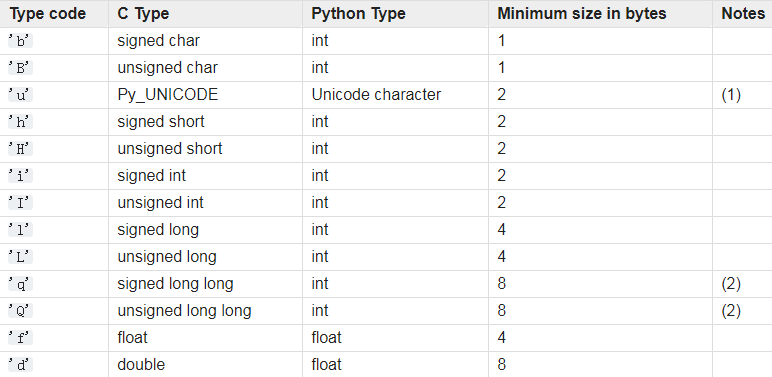

In [30]:
from array import array
from random import random
floats=array('d',(random() for i in range(10**7)))
floats[-1]

0.6042542967601301

In [56]:
fp = open('floats.bin', 'wb')
floats.tofile(fp)
fp.close()
floats2=array('d')
fp=open('floats.bin','rb')
floats2.fromfile(fp,10**7)
floats2[-1]
fp.close()

In [34]:
floats==floats2

True

### Memory views
A memoryview is essentially a generalized NumPy array structure in Python itself
(without the math). It allows you to share memory between data-structures (things like
PIL images, SQLlite databases, NumPy arrays, etc.) without first copying. This is very
important for large data sets.
Using notation similar to the array module, the memoryview.cast method lets you
change the way multiple bytes are read or written as units without moving bits
around — just like the C cast operator. memoryview.cast returns yet another memory
view object, always sharing the same memory.

In [37]:
from array import array
numbers = array('h', [-2, -1, 0, 1, 2])
memv = memoryview(numbers)
len(memv)

5

In [38]:
memv[0]

-2

In [39]:
memv_oct = memv.cast('B')
memv_oct.tolist()

[254, 255, 255, 255, 0, 0, 1, 0, 2, 0]

In [40]:
memv_oct[5] = 4
numbers

array('h', [-2, -1, 1024, 1, 2])

Meanwhile, if you are doing advanced numeric processing in arrays, then you should
be using the NumPy and SciPy libraries. We’ll take a brief look at them right away.
### NumPy and SciPy
SciPy is a library, written on top of NumPy, offering many scientific computing algorithms
from linear algebra, numerical calculus and statistics. SciPy is fast and reliable
because it leverages the widely-used C and Fortran codebase from the Netlib Repository.
In other words, SciPy gives scientists the best of both worlds: an interactive prompt
and high-level Python APIs, together with industrial-strength number crunching functions
optimized in C and Fortran.

In [41]:
import numpy as np
a=np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
type(a)

numpy.ndarray

In [43]:
a.shape

(12,)

In [45]:
a.shape=3,4
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [46]:
a[2]

array([ 8,  9, 10, 11])

In [48]:
a[:,1]

array([1, 5, 9])

In [49]:
a.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

This was just an appetizer. NumPy and SciPy are formidable libraries, and are the foundation
of other awesome tools such as the Pandas and Blaze data analysis libraries, which
provide efficient array types that can to hold non-numeric data as well as import/export
functions compatible with many different formats like .csv, .xls, SQL dumps, HDF5
etc. These packages deserve entire books about them.
### Deques and other queues
The class collections.deque is a thread-safe double-ended queue designed for fast
inserting and removing from both ends. It is also the way to go if you need to keep a list
of “last seen items” or something like that, because a deque can be bounded — i.e. created
with a maximum length and then, when it is full, it discards items from the opposite
end when you append new ones.

In [50]:
from collections import deque
dq = deque(range(10), maxlen=10)
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
dq.rotate(3)
dq

deque([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [52]:
dq.rotate(-4)
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [53]:
dq.appendleft(-1)
dq

deque([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
dq.extend([11, 22, 33])
dq

deque([3, 4, 5, 6, 7, 8, 9, 11, 22, 33])

In [55]:
dq.extendleft([10, 20, 30, 40])
dq

deque([40, 30, 20, 10, 3, 4, 5, 6, 7, 8])

note that extendleft(iter) works by appending each successive item of the
iter argument to the left of the deque, therefore the final position of the items
is reversed.
The append and popleft operations are atomic, so deque is safe to use as a LIFO-queue
in multi-threaded applications without the need for using locks.

queue
Provides the synchronized (i.e. thread-safe) classes Queue, LifoQueue and Priori
tyQueue. These are used for safe communication between threads. All three classes
can be bounded by providing a maxsize argument greater than 0 to the constructor.
However, they don’t discard items to make room as deque does. Instead, when the
queue is full the insertion of a new item blocks — i.e. it waits until some other thread
makes room by taking an item from the queue, which is useful to throttle the number
of live threads.
multiprocessing
Implements its own bounded Queue, very similar to queue.Queue but designed for
inter-process communication. There is also has a specialized multiprocess
ing.JoinableQueue for easier task management.
asyncio
Newly added to Python 3.4, asyncio provides Queue, LifoQueue, PriorityQueue
and JoinableQueue with APIs inspired by the classes in queue and multiprocess
ing, but adapted for managing tasks in asynchronous programming.
heapq
In contrast to the previous three modules, heapq does not implement a queue class,
but provides functions like heappush and heappop that let you use a mutable sequence
as a heap queue or priority queue.